# K-Means Clustering (2-Optimized Version)

This is a version of k-means algorithm in which it is precently applied an optimization technique. Basically this code performs a k-means to cluster faces.

##Optimization
Before clustering, the dataset labelled to each subject is indipendently subclustered in 2 subclusters to increase the precision. This method is meant to reduce the number of elements per cluster in order to increase their spacial intercorrelation.

It is decided the number 2 for time purposes but in a future this part must be changed into a dynamic choose of the proper number of subclusters

##The code
The code performs all the operations to prepare the clustering and the operations needed to pair the generated labels of the clustering with the old ones.

##The testing
Each subject has an old_label. That old_label is linked to other 2 labels. Each label is linked to one generated_label by the array solution.

There are 2 ways to test the clustering. The first one starts from the subject to identify returning the corresponding labels. The second one starts from a testing file, returning the precision of the labelling operation.

#Code

##Setup

In [18]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
%matplotlib inline

import random
from sklearn.decomposition import PCA

from pulp import *

In [19]:
#Dataset
url = '../csv_files/final_training.csv' 

dataset = []

#Read csv and put everything into a matrix
reader = csv.reader(open(url), delimiter=",")
x = list(reader)
dataset = np.array(x).astype("float")

#Sort the dataset matrix to ensure consistent calculation
row_length = dataset[0,:].size
dataset = sorted(dataset,key=lambda x:x[row_length-1])
dataset = np.array(dataset)

#Variables

#Setting variables
labels = dataset[:,(dataset.shape[1]-1)]
dataset = dataset[:,:(dataset.shape[1]-1)]
dataset_size = dataset[:,0].size
row_length = dataset[0,:].size

#Number of clusters
number_clusters = 1
for i in range(1, dataset_size):
  if labels[i] != labels[i-1]:
    number_clusters += 1
    
#Labels without repetitions
labels_h = []
labels_h.append(labels[0])
for i in range(1, dataset_size):
  if (labels[i] != labels[i-1]):
    labels_h.append(labels[i])
    
old_labels = labels
old_labels_h = labels_h
    
print('dataset_size:', dataset_size)
print('number_clusters:', number_clusters)
print('labels_h:', labels_h)

dataset_size: 4320
number_clusters: 62
labels_h: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0]


##Optimization

In [20]:
#Subclustering and generation of new labels
subcluster_number = 1

for i in range(number_clusters):
  curr_cluster = []
  curr_cluster_index = []
  
  #Get the current label rows and their indexes
  for j in range(dataset_size):
    if labels[j] == labels_h[i]:
      curr_cluster.append(dataset[j])
      curr_cluster_index.append(j)     
      
      #Pre updating labels. Useful later on
      labels[j] = labels[j] * 1000
      
  if len(curr_cluster) > (subcluster_number - 1):
    #Subclustering
    kmeans = KMeans(n_clusters=subcluster_number, random_state=0).fit(curr_cluster)
    generated_labels = kmeans.labels_
    
    for j in range(generated_labels.size):
      labels[curr_cluster_index[j]] = labels[curr_cluster_index[j]] + generated_labels[j]

In [21]:
#Putting the optimized dataset back together
dataset = np.insert(dataset, dataset.shape[1], labels, axis=1)

In [22]:
#Sort the dataset matrix for further elaboration
dataset = sorted(dataset,key=lambda x:x[row_length])
dataset = np.array(dataset)

In [23]:
#Setting variables on optimized dataset
labels = dataset[:,(dataset.shape[1]-1)]
dataset = dataset[:,:(dataset.shape[1]-1)]
dataset_size = dataset[:,0].size
row_length = dataset[0,:].size

#Number of clusters
number_clusters = 1
for i in range(1, dataset_size):
  if labels[i] != labels[i-1]:
    number_clusters += 1
    
#Labels without repetitions
labels_h = []
labels_h.append(labels[0])
for i in range(1, dataset_size):
  if (labels[i] != labels[i-1]):
    labels_h.append(labels[i])
    
print('dataset_size:', dataset_size)
print('number_clusters:', number_clusters)
print('labels_h:', labels_h)

dataset_size: 4320
number_clusters: 62
labels_h: [1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 17000.0, 18000.0, 19000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 25000.0, 26000.0, 27000.0, 28000.0, 29000.0, 30000.0, 31000.0, 32000.0, 33000.0, 34000.0, 35000.0, 36000.0, 37000.0, 38000.0, 39000.0, 40000.0, 41000.0, 42000.0, 43000.0, 44000.0, 45000.0, 46000.0, 47000.0, 48000.0, 49000.0, 50000.0, 51000.0, 52000.0, 53000.0, 54000.0, 55000.0, 56000.0, 57000.0, 58000.0, 59000.0, 60000.0, 61000.0, 62000.0]


##Clustering Block

In [24]:
#Applying kmeans classifier
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(dataset)
generated_labels = kmeans.labels_

In [25]:
#Filling this array before doing the validation
generated_labels_h = [] 

#Copy the list of the labels to avoid side effects
sorted_generated_labels = generated_labels.copy()
sorted_generated_labels.sort()

#Extract generated labels without repetition
generated_labels_h.append(sorted_generated_labels[0])
for i in range(1, dataset_size):
  if (sorted_generated_labels[i] != sorted_generated_labels[i-1]):
    generated_labels_h.append(sorted_generated_labels[i])

##Matching Block

In [26]:
#Building the flow matrix
flow = []    

for curr_label in range(number_clusters):
  #Getting the precision flow per label index
  precision_flow = np.zeros(number_clusters)
  
  #Getting the generated labels for the current labels
  generated_curr_labels = []
  for i in range(dataset_size):
    if labels[i] == labels_h[curr_label]:
      generated_curr_labels.append(kmeans.predict([dataset[i,:]]))

  generated_curr_labels.sort()
  curr_generated_label = generated_curr_labels[0]
  curr_generated_label_occurrences = 1
  
  for i in range(1, len(generated_curr_labels)):
    
    if curr_generated_label != generated_curr_labels[i]:
      #If the label changes, it is calulated the percentage precision in the vector 
      precision_flow[curr_generated_label] = curr_generated_label_occurrences / len(generated_curr_labels) * 100
      
      curr_generated_label = generated_curr_labels[i]
      curr_generated_label_occurrences = 1
    else:
      #If the label doesn't change, it is set one occurrence more
      curr_generated_label_occurrences += 1
  
  #Otherwise the algorithm doesn't find the last item because there is no
  #other element at the end to trigger the if condition
  precision_flow[curr_generated_label] = curr_generated_label_occurrences / len(generated_curr_labels) * 100
  
  flow.append(precision_flow)

In [27]:
def calculate_matching(flow):
  n = flow[0].size #number of subjects = number of clusters
  problem = LpProblem("From Label to Cluster", LpMinimize)
  
  #GENERATE LP PROBLEM VARIABLES
  x = [[]]*n
  for i in range(0, n):
    x[i] = np.empty(n, dtype=LpVariable)
    for j in range(0, n):
      #generate variable which represents flux on edge (u, v) for all u representing labels and for all v representing clusters
      exec("x[%d][%d] = LpVariable(\"x_%d_%d\",0,1,LpInteger)" % (i, j, i, j))      
  
  #SET THE OBJECTIVE FUNCTION
  problem += sum((-flow[i][j])*x[i][j] for i in range(0, n) for j in range(0, n)), "Objective function"
  
  #COSTRAINTS
  problem += sum(x[i][j] for i in range(0, n) for j in range(0, n)) == n, "Exactly n couples found"
  
  #COSTRAINTS
  for i in range(0, n):
    str = "Exactly one cluster for label %d" %i
    problem += sum(x[i][j] for j in range(0, n)) == 1, str
    
  #COSTRAINTS
  for j in range(0, n):
    str = "Exactly one label for cluster %d" %j
    problem += sum(x[i][j] for i in range(0, n)) == 1, str
    
  #SOLVE
  matching = [0]*n
  #print(problem)
  if problem.solve() == 1: #OPTIMUM OBTAINED: SET RETURN VALUES
    for v in problem.variables():
      if v.varValue == 1:
        split = v.name.split("_")
        i = int(split[1])
        j = int(split[2])
        #uncomment to return an array where the i-th value is our custom label corresponding to the i-th cluster
        #matching[j] = i
        #uncomment to return an array where the i-th value is the cluster corresponding to the i-th subject
        matching[i] = j
        
  else: 
    print("Matching not found!")
    
  return matching

In [28]:
#The array 'solution' links the index of the starting label
#with the generated one. For example
# let labels_h = [5, 7, 4, 2]
# so solution[2] means the generatedd label corresponding to 
# the originary label 4
solution = calculate_matching(flow)

##Validation Block

In [29]:
#Set the overall precision of the model
precision = []
overall = 0
for i in range(number_clusters):
  precision.append(flow[i][solution[i]])
  
  #Number of items per cluster
  number_items = 0
  for j in range(dataset_size):
    if labels_h[i] == labels[j]:
      number_items += 1
      
  overall += (precision[i] * number_items)

overall = overall / dataset_size
print(overall, '%')

71.85185185185185 %


##Plotting Block

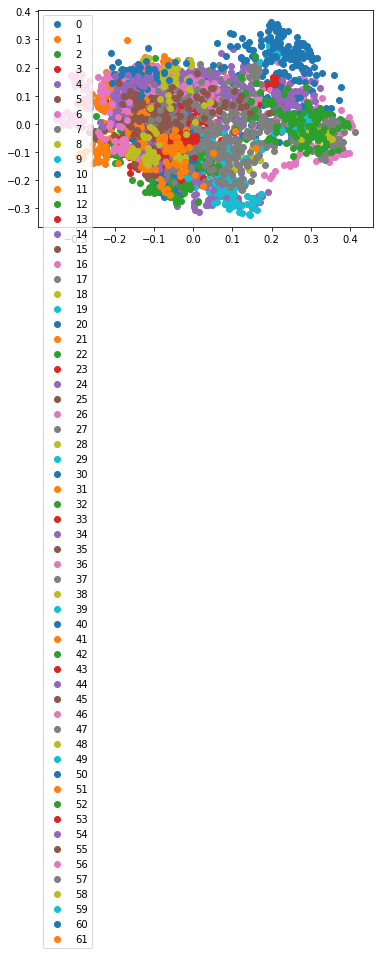

In [30]:
#Normalizing data for visualization
dataset_norm = (dataset - dataset.min())/(dataset.max() - dataset.min())

pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(dataset_norm))

plt.scatter(transformed[generated_labels==i][0], transformed[generated_labels==i][1], label=i)
  
  
plt.legend()
plt.show()

##Testing Block

In [31]:
subject = 10
#Manual checking
subject_label_index = [] # the indexes in labels_h of the subclustered labels
subject_labels = [] # the subclustered label_h - for visualization only

#Extraction of the originary labels belonging to the subject
for i in range(number_clusters):
  if old_labels_h[subject]*1000 <= labels_h[i]:
    if (old_labels_h[subject]+1)*1000 > labels_h[i]:
      subject_label_index.append(i)
      subject_labels.append(labels_h[i]) #for visualization only

error = 0
num_items = 0
subject_generated_labels = []  # for visualization only
subject_correct_generated_labels = [] # for visualization only

#Getting the precision
for i in range(len(subject_label_index)):
  curr_label = labels_h[subject_label_index[i]]
  curr_solution = solution[subject_label_index[i]]
  
  for j in range(dataset_size):
    if labels[j] == curr_label:
      tested_label = kmeans.predict([dataset[j,:]])
      subject_generated_labels.append(tested_label[0]) # for visualization only
      subject_correct_generated_labels.append(curr_solution) # for visualization only
      num_items += 1
      
      if tested_label != curr_solution:
        error += 1

#Printing
print('Subject number:', subject)
print('Dataset label:',old_labels_h[subject])
print('Associated labels:',subject_labels)
print()
print('Solution labels:',subject_correct_generated_labels)
print('Predicted labels:',subject_generated_labels)
print('Precision:', (num_items-error)/num_items*100, '%')

Subject number: 10
Dataset label: 11.0
Associated labels: [11000.0]

Solution labels: [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
Predicted labels: [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 31, 31, 31, 31, 31, 31, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
Precision: 91.42857142857143 %


In [32]:
#Test from dataset
url = "../csv_files/testing/1_Indoor_lights_cooperative_testing.csv"

test_dataset = []

#Read csv and put everything into a matrix
reader = csv.reader(open(url), delimiter=",")
x = list(reader)
test_dataset = np.array(x).astype("float")

#Variables of the testing dataset
test_labels = test_dataset[:,(test_dataset.shape[1]-1)]
test_dataset = test_dataset[:,:(test_dataset.shape[1]-1)]
test_dataset_size = test_dataset[:,0].size

#Predict
tested_predicted_labels = kmeans.predict(test_dataset)

correct_matchings = 0
wrong_matchings = 0

for i in range(test_dataset_size):
  
  for j in range(number_clusters):
    if solution[j] == tested_predicted_labels[i]:
      paired_sublabel = labels_h[j]
      originary_label = int(round(labels_h[j]/1000))
      
      if (test_labels[i] == originary_label):
        correct_matchings += 1
      else:
        wrong_matchings += 1
        
print('Correct Matchings:', correct_matchings)
print('Wrong Matchings:', wrong_matchings)
print('Precision: ', correct_matchings / (correct_matchings + wrong_matchings) * 100, '%')

Correct Matchings: 279
Wrong Matchings: 31
Precision:  90.0 %
